## Logistic Regression Exercise

**Part 1: Load and explore**

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

1. Load the dataset and display the first few rows.

In [2]:
Movies = pd.read_csv('../data/movies.csv')
Movies.head()

,Title,Year,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Nominee,Winner,Genre_Action,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,#Alive,2020,7.228,1956,6300000,13416285,614696,0,0,True,...,False,True,False,False,False,True,False,False,False,False
1,10 Cloverfield Lane,2016,6.994,8359,15000000,110216998,333371,0,0,False,...,False,True,False,False,False,True,False,True,False,False
2,12 Strong,2018,6.346,3097,35000000,67450815,429351,0,0,True,...,True,False,False,False,False,False,False,False,True,False
3,13 Hours: The Secret Soldiers of Benghazi,2016,7.269,3789,50000000,69411370,300671,0,0,True,...,True,False,False,False,False,False,False,True,True,False
4,1917,2019,8.000,13092,100000000,446064352,530915,1,0,True,...,True,False,False,False,False,False,False,False,True,False


2. How many movies in the dataset were nominated for Best Picture?  
                         

In [3]:
#Create variable to count the number of nominees and non-nominees 
Counts = Movies["Nominee"].value_counts()
Counts

Nominee
0    914
1     91
Name: count, dtype: int64

In [4]:
#From Counts variable create another string to separate movies nominated for best picture from those that were not.
Nominees = Counts.get(1)
Nominees 
#after checking your work then create an f'string to fully express what the number means
(f'The number of movies nominated for best picture is {Nominees}')
print(f'{Nominees} movies were nominated for best picture')

91 movies were nominated for best picture


3. What percentage of movies were nominated?  

In [5]:
Not_Nominees = Counts.get(0)
Not_Nominees
(f'{Not_Nominees} movies were NOT nominated for best picture')

'914 movies were NOT nominated for best picture'

In [6]:
Total_Noms = Not_Nominees + Nominees
Total_Noms
Percentage_Nominated = Nominees/Total_Noms
print(f'{Percentage_Nominated: .0%} of movies were nominated')

 9% of movies were nominated


4. Compute the average revenue for:  
    * nominated movies  
    * non-nominated movies  
Does revenue look associated with nominations?

In [7]:
Movies_Rev = Movies.groupby("Nominee")["Revenue"].sum()
Movies_Nominated_Rev = Movies_Rev.get(1)
Movies_Not_Nom_Rev = Movies_Rev.get(0)
Avg_Nom_Rev = Movies_Nominated_Rev / Nominees
Avg_NomNon_Rev = Movies_Not_Nom_Rev / Not_Nominees
Movie_NonNom_dollars = f"${Avg_NomNon_Rev:,.2f}"
Movie_Nom_dollars = f"${Avg_Nom_Rev:,.2f}"
(f'The average revenue for all nomominated movies is {Movie_Nom_dollars} while the average revenue for movies that were not nominated is {Movie_NonNom_dollars}')


'The average revenue for all nomominated movies is $232,573,777.25 while the average revenue for movies that were not nominated is $189,624,332.38'

In [8]:
Movies_Not_Nom_Rev

np.int64(173316639799)

**Part 2: Logistic Regression: Revenue Only**

5. Fit a logistic regression model for whether a movie was nominated based on its revenue.  

In [9]:
Movies.head()

,Title,Year,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Nominee,Winner,Genre_Action,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,#Alive,2020,7.228,1956,6300000,13416285,614696,0,0,True,...,False,True,False,False,False,True,False,False,False,False
1,10 Cloverfield Lane,2016,6.994,8359,15000000,110216998,333371,0,0,False,...,False,True,False,False,False,True,False,True,False,False
2,12 Strong,2018,6.346,3097,35000000,67450815,429351,0,0,True,...,True,False,False,False,False,False,False,False,True,False
3,13 Hours: The Secret Soldiers of Benghazi,2016,7.269,3789,50000000,69411370,300671,0,0,True,...,True,False,False,False,False,False,False,True,True,False
4,1917,2019,8.000,13092,100000000,446064352,530915,1,0,True,...,True,False,False,False,False,False,False,False,True,False


In [10]:
Nominated_for_Rev = smf.logit('Nominee ~ Revenue', data = Movies).fit()

Optimization terminated successfully.
         Current function value: 0.303106
         Iterations 6


6. Interpret the sign of the coefficient for Revenue.  

In [11]:
Nominated_for_Rev.params

Intercept   -2.385659e+00
Revenue      3.752031e-10
dtype: float64

In [12]:
print(f'as revenue increases the probability of a movie being nominated increases')

as revenue increases the probability of a movie being nominated increases


7. Use the model to estimate the probability of nomination for a movie with $10M revenue, $100M revenue, and $500M revenue.  

In [13]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [14]:
Rev = 10000000

Logit_10 = Nominated_for_Rev.params['Intercept'] + Nominated_for_Rev.params['Revenue']*Rev

print(f'Estimated probability of being nomination: {logistic(Logit_10): .0%}')

Estimated probability of being nomination:  8%


In [15]:
Rev = 100000000

Logit_100 = Nominated_for_Rev.params['Intercept'] + Nominated_for_Rev.params['Revenue']*Rev

print(f'Estimated probability of being nominated: {logistic(Logit_100): .0%}') 

Estimated probability of being nominated:  9%


In [16]:
Rev = 500000000

Logit_500 = Nominated_for_Rev.params['Intercept'] + Nominated_for_Rev.params['Revenue']*Rev

print(f'Estimated probability of being nominated: {logistic(Logit_500): .0%}') 

Estimated probability of being nominated:  10%


In [42]:
# And here is a more efficicent from the teacher 
pred_df = pd.DataFrame({
    'Revenue': (10000000, 100000000, 500000000)
})
Nominated_for_Rev.predict(pred_df)

0    0.084563
1    0.087214
2    0.099925
dtype: float64

8. Make a plot of predicted probability vs. revenue.

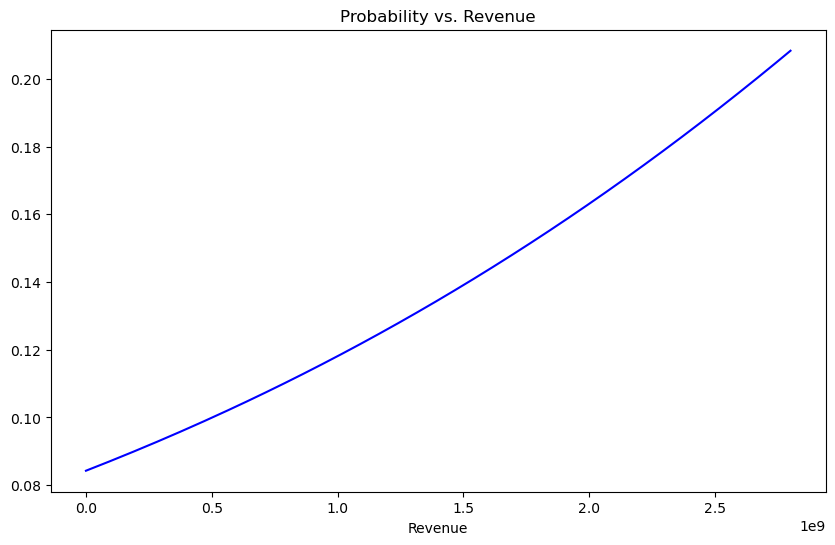

In [48]:
fit_df = pd.DataFrame({
    'Revenue' : np.linspace(start = Movies['Revenue'].min(),
                             stop = Movies['Revenue'].max(),
                             num = 150)
})

fit_df['fit'] = Nominated_for_Rev.predict(fit_df)

fit_df.plot(x = 'Revenue',
            y = 'fit',
            legend = False,
            figsize = (10,6),
            color = "blue", 
            title = "Probability vs. Revenue");                      

So either the probability of a movie being nominated increases the more revenue it has OR a movie earns more revenue if it is nominated. 

**Part 3: Add Genre**

9. Fit a model for whether a movie was nominated based on its revenue and whether or not it is a drama.  
    

In [78]:
# Use the logit method and simply use + sign to add another predictor variable. Same goes if you have more than one extra predictor variable 
Nominated_Rev_Drama = smf.logit('Nominee ~ Revenue + Genre_Drama', data = Movies).fit()

Optimization terminated successfully.
         Current function value: 0.234564
         Iterations 8


10. Interpret the coefficient for Genre_Drama. 
   

In [79]:
Nominated_Rev_Drama.params

Intercept             -4.783568e+00
Genre_Drama[T.True]    3.340881e+00
Revenue                1.727152e-09
dtype: float64

A positive number for Genre_Drama means that the probability of being nominated increases if your move is a drama. 

                          
11. Using your final model, compute the predicted probabilities of nominations for:  
    * $20M non-drama
    * $20M drama
    * $300M non-drama
    * $300M drama  

In [98]:
np.exp(Nominated_Rev_Drama.params['Genre_Drama[T.True]'])

np.float64(28.243998621384808)

In [94]:
Rev = 20000000

Logit_20M = Nominated_Rev_Drama.params['Intercept'] + Nominated_Rev_Drama.params['Genre_Drama[T.True]'] + Nominated_Rev_Drama.params['Revenue']*Rev

print(f'Estimated probability of a drama movie with $20 million in revenue is nominated: {logistic(Logit_20M): .0%}')

Estimated probability of a drama movie with $20 million in revenue is nominated:  20%


In [96]:
Rev = 300000000

Logit_300M = Nominated_Rev_Drama.params['Intercept'] + Nominated_Rev_Drama.params['Genre_Drama[T.True]'] + Nominated_Rev_Drama.params['Revenue']*Rev

print(f'Estimated probability of a drama movie with $300 million in revenue is nominated: {logistic(Logit_300M): .0%}')

Estimated probability of a drama movie with $300 million in revenue is nominated:  28%


In [74]:
Drama_Nominee.params

Intercept             -4.058874
Genre_Drama[T.True]    2.816884
dtype: float64

In [72]:
Non_Drama = Movies[Movies['Genre_Drama'] == False]
Non_Drama.head()

,Title,Year,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Nominee,Winner,Genre_Action,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,#Alive,2020,7.228,1956,6300000,13416285,614696,0,0,True,...,False,True,False,False,False,True,False,False,False,False
8,47 Meters Down,2017,5.808,2789,5500000,62198461,403119,0,0,False,...,False,True,False,False,False,False,False,True,False,False
9,6 Underground,2019,6.340,4988,150000000,0,509967,0,0,True,...,False,False,False,False,False,False,False,True,False,False
10,65,2023,5.964,2679,45000000,60730568,700391,0,0,True,...,False,False,False,False,False,True,False,False,False,False
12,A Cure for Wellness,2017,6.341,4046,40000000,26620002,340837,0,0,False,...,False,True,False,True,False,True,False,False,False,False


12. Which variable has the larger effect: being a drama or revenue?